In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 

df = pd.read_csv('rice.csv')
df

,Soil_Moisture,Temperature,Humidity,Time,Status
0,54,22,70,21,1
1,12,20,40,104,0
2,34,26,35,62,1
3,7,44,44,93,0
4,50,38,23,92,0
...,...,...,...,...,...
99995,74,3,29,83,0
99996,58,10,46,82,0
99997,4,35,39,17,1
99998,83,36,56,15,0


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Status'])
y = df['Status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

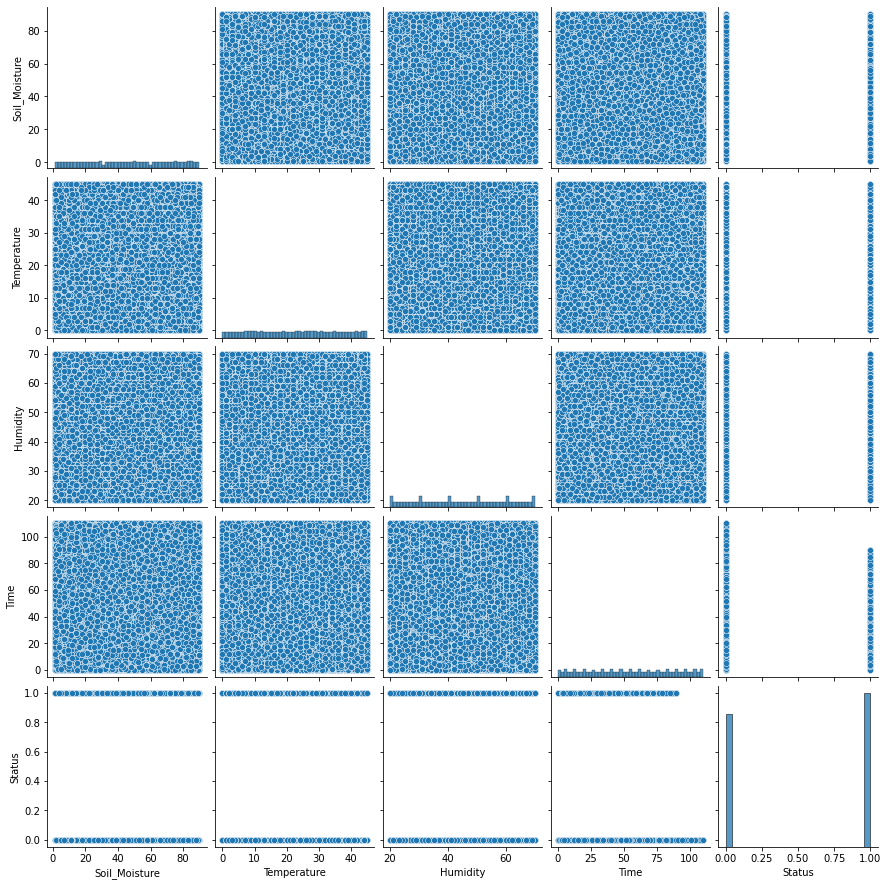

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import naive_bayes
from sklearn import ensemble

#clf = KNeighborsClassifier(n_neighbors=4)

#clf = naive_bayes.GaussianNB()
#clf = naive_bayes.MultinomialNB()
#clf = naive_bayes.BernoulliNB()
#clf = naive_bayes.ComplementNB()
#clf = naive_bayes.CategoricalNB()

#clf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)

#clf = svm.SVC(kernel='linear')
#clf = svm.LinearSVC(random_state=0, tol=1e-5, max_iter=1000000)
n_estimators = 10
clf = ensemble.BaggingClassifier(svm.SVC(kernel='linear', probability=True, class_weight='balanced', verbose=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators, verbose=1)

from joblib import parallel_backend
with parallel_backend('threading', n_jobs=3):
    clf.fit(X_train, y_train)

# cvs = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
# print(cvs)
# print("Rata - rata:", np.mean(cvs))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed: 26.6min finished


In [5]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Akurasi:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Akurasi: 0.71856
Precision: 0.732614869292944
Recall: 0.7494227188081937


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s finished


In [6]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

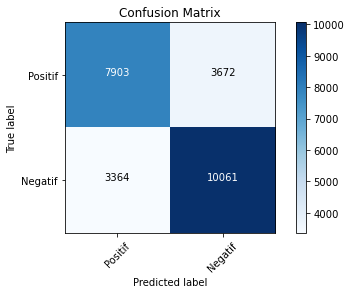

In [7]:
cm_plot_labels = ['Positif', 'Negatif']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [8]:
print ("Hasil Klasifikasi: \n", metrics.classification_report(y_test, y_pred, zero_division=1))

Hasil Klasifikasi: 
               precision    recall  f1-score   support

           0       0.70      0.68      0.69     11575
           1       0.73      0.75      0.74     13425

    accuracy                           0.72     25000
   macro avg       0.72      0.72      0.72     25000
weighted avg       0.72      0.72      0.72     25000

